/Users/main/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

No handles with labels found to put in legend.


Prediction [1 1 1 ... 1 1 1]
Actual     [1 1 1 ... 1 1 1]
Accuracy   98.72282942404519%
Weight 1 0.7398609614141001
Weight 2 0.15520501315178592


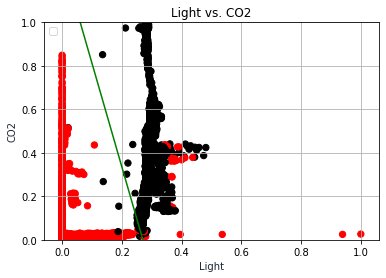

In [3]:
#dataset: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+
import chart_studio.plotly as py
import plotly.graph_objs as go
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib import pylab
import matplotlib as mat
from matplotlib import *
import pandas as pd
from sklearn.linear_model import perceptron
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.pipeline import Pipeline
import math

# Importing the dataset
df = pd.read_csv('datatraining.txt')
df.columns = ["Date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
df.head()

#normalize data inputs to between 0 and 1
light = []
co2 = []
for i in range(8143):
    light.append((df.iloc[i,3] - min(df["Light"]))/(max(df["Light"]) - min(df["Light"])))
    co2.append((df.iloc[i,4] - min(df["CO2"]))/(max(df["CO2"]) - min(df["CO2"])))
    
#define 2-D array X as input and t as class data
X = np.array([light, co2])
t = np.array(df["Occupancy"])

#plot x1, x2 and color by occupancy. red = 0 (empty), black = 1(occupied)
colormap = np.array(['r', 'k'])
fig1 = plt.scatter(X[0], X[1], c=colormap[t], s=40)
plt.xlabel('Light')
plt.ylabel('CO2')

# format x1,x2 information
A = []
for i in range(8143):
    A.append([light[i], co2[i]])   



#initiate perceptron
net = perceptron.Perceptron(max_iter = 2, eta0 = 0.1)
net = net.fit(A,t)


#run and print sample statistics for given perceptron
print( "Prediction " + str(net.predict(A)))
print( "Actual     " + str(t) )
print( "Accuracy   " + str(net.score(A, t)*100) + "%" )

# Output the values
print( "Weight 1 " + str(net.coef_[0,0]))
print( "Weight 2 " + str(net.coef_[0,1]))
#print ("Bias " + str(net.intercept_))

x = np.linspace(0,1,95)
y = (-(net.intercept_ / net.coef_[0,1]) / (net.intercept_ / net.coef_[0,0]))*x + (-net.intercept_ / net.coef_[0,1])
plt.plot(x, y, '-g')
plt.title('Light vs. CO2')
plt.xlabel('Light', color='#1C2833')
plt.ylabel('CO2', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

#print(df[0:40])



In [4]:
## polynomial classifier by hand
w0 = random.randint(-1,1)
w1 = random.randint(-1,1)
w2 = random.randint(-1,1)
w3 = random.randint(-1,1)
w4 = random.randint(-1,1)
w5 = random.randint(-1,1)

weight_list = [w1,w2,w3,w4,w5]


def perceptron_learning(weight, learning_rate, actual, predicted, x1):
    weight = weight + learning_rate*(actual - predicted)*x1
    return weight
    
def wixi(w0, w1, w2, w3, w4, w5, learning_rate, epochs):
    k=0
    accuracy_vals = []
    weight_list = [w1,w2,w3,w4,w5]
    vals = [w1,w2,w3,w4,w5]
    while k != epochs:
        k+=1
        prediction = []
        actual = []
        j = 0
        z_list = []
        total = []
        temp_sum = 0
        num_right = 0
        num_wrong = 0
        for element in A:
            x1 = element[0]
            x2 = element[1]
            z1 = x1*1
            z2 = x2*1
            z3 = x1*x1
            z4 = x1*x2
            z5 = x2*x2
            z_list.append(z1)
            z_list.append(z2)
            z_list.append(z3)
            z_list.append(z4)
            z_list.append(z5)
            total.append(w0*1)
            total.append(weight_list[-5]*z1) 
            total.append(weight_list[-4]*z2)
            total.append(weight_list[-3]*z3) 
            total.append(weight_list[-2]*z4) 
            total.append(weight_list[-1]*z5)
            temp_sum = sum(total,total[0])

            #sum = w0 + w1*x1 + w2*x2 + w3*x1*x1 + w4*x1*x2 + w5*x2*x2

            if temp_sum > 0:
                h1 = 1
            elif temp_sum <= 0:
                h1 = 0
            prediction.append(h1)
            actual.append(df.iloc[j,6])
            if h1 != actual[j]:
                num_wrong += 1
            elif h1 == actual[j]:
                num_right += 1
            for i in range(5):
                #print(weight_list)
                weight_list.append(perceptron_learning(vals[-1 - i],learning_rate,actual[-1], prediction[-1], z_list[i]))
            for element in weight_list:
                vals.append(element)
            j+=1
        accuracy = num_right/(num_right + num_wrong) * 100
        accuracy_vals.append(accuracy)
        display(weight_list)
    return accuracy_vals

#prints first 10 weights -- weights w1 through w5, repeated 2 times. This shows the evolution of the weight values as the perceptron learns
def display(weight_list):
    for i in range(0, 10):
        print("Weight " + str(i) + ": " + str(weight_list[i]))

accuracy_vals = wixi(w0,w1,w2,w3,w4,w5, 0.5, 2)
avg = sum(accuracy_vals)/len(accuracy_vals)
print("First two epochs accuracy values:")
print(accuracy_vals)
print("Average accuracy over 2 epochs " + str(avg))

Weight 0: -1
Weight 1: 0
Weight 2: 0
Weight 3: -1
Weight 4: 0
Weight 5: 0.0
Weight 6: -1.0
Weight 7: 0.0
Weight 8: 0.0
Weight 9: -1.0
Weight 0: -1
Weight 1: 0
Weight 2: 0
Weight 3: -1
Weight 4: 0
Weight 5: 0.0
Weight 6: -1.0
Weight 7: 0.0
Weight 8: 0.0
Weight 9: -1.0
First two epochs accuracy values:
[62.090138769495276, 61.36559007736706]
Average accuracy over 2 epochs 61.72786442343117


In [54]:
#export normalized data to csv:
light_export = pd.DataFrame(light)
co2_export = pd.DataFrame(co2)

df = pd.concat([df, light_export], axis=1)
df = pd.concat([df, co2_export], axis=1)
df.to_excel("normalized_data.xlsx", encoding='utf-8', index=False)
df.head()

,Date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,0,0,0,0,0,0,0,0,0,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275490,0.275490,0.190933,0.275490,0.190933,0.275490,0.190933,0.275490,0.190933
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1.0,0.277754,0.277754,0.277754,0.186446,0.277754,0.186446,0.277754,0.186446,0.277754,0.186446
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1.0,0.275490,0.275490,0.275490,0.186136,0.275490,0.186136,0.275490,0.186136,0.275490,0.186136
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1.0,0.275490,0.275490,0.275490,0.182887,0.275490,0.182887,0.275490,0.182887,0.275490,0.182887
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1.0,0.275490,0.275490,0.275490,0.180566,0.275490,0.180566,0.275490,0.180566,0.275490,0.180566
